**Performing the EDA on dataset and finding out which factors influence the price of Health Insurance**

In [ ]:
# Importing the neccessary libraries which will require throughout the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
#reading the file and print the head of the file.File is uploaded on colab notebook 
insurance_df=pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_df.shape

(1338, 10)

In [ ]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Encoding the region column
temp=pd.get_dummies(insurance_df['region'])
temp.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
insurance_df.drop('region',axis=1,inplace=True)

In [ ]:
insurance_df=pd.concat([insurance_df,temp],axis=1)
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [ ]:
# COnverting the categorical values in sex and smoker column to numeric value using map
map={'yes':1,'no':0}
insurance_df['smoker']=insurance_df['smoker'].map(map)
map1={'male':1,'female':0}
insurance_df['sex']=insurance_df['sex'].map(map1)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
# Finding the correlated columns by using corr() and heatmap
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


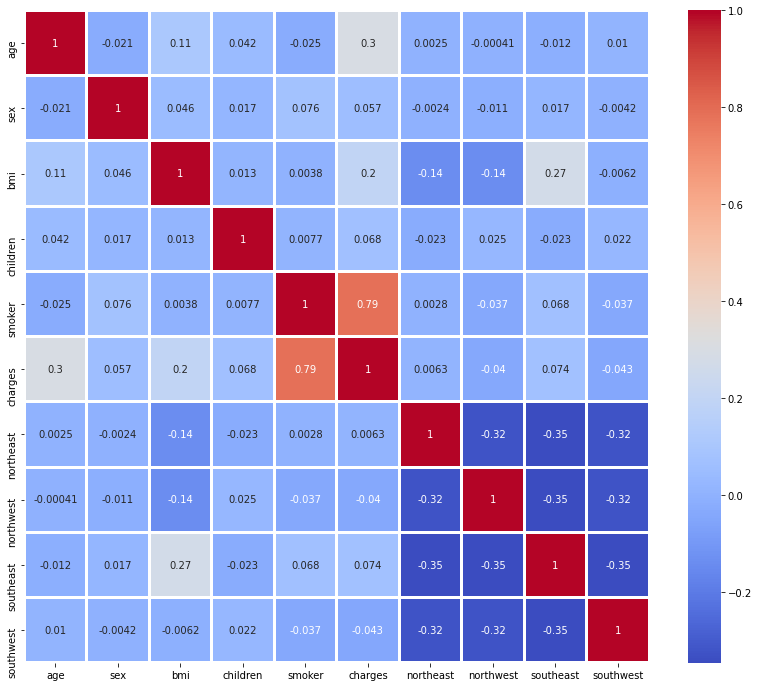

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(14,12))
sns.heatmap(insurance_df.corr(),cmap='coolwarm',linewidths=2,annot=True)

**Observation**
*   It shows the strong positive relation between parameter 'smoker' and 'charges' 




Text(0, 0.5, 'Charges')

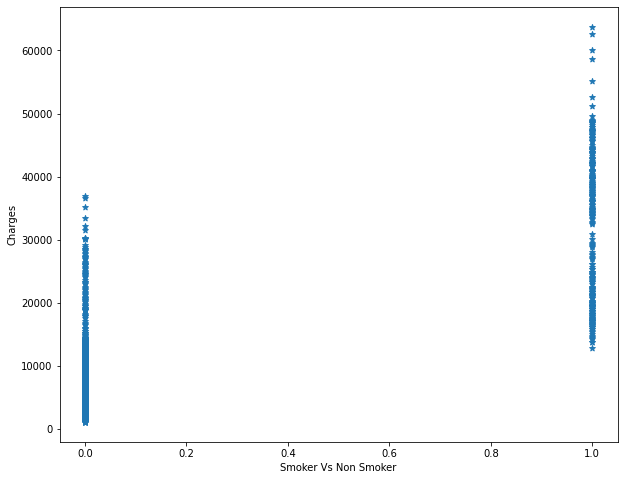

In [ ]:
x=insurance_df['smoker']
y=insurance_df['charges']
plt.figure(figsize=(10,8))
plt.scatter(x,y,marker='*',)
plt.xlabel('Smoker Vs Non Smoker')
plt.ylabel('Charges')


**Observation**
*   The charges for non-smoking person are between 0 to 38000
*   The charges for smoking person are betweeb 15000 to 650000
*   Person with smokinf habit need more money for insurance






Defining the Target and Input variable

In [ ]:
# X is input variable and Y is dependent variable
X=insurance_df.drop('charges',axis=1)
Y=insurance_df['charges']

**Training the Model and Splitting the data**

In [ ]:
# training the model using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.15,random_state=42)

**Creating a machine learning model**

In [ ]:
# Loading the linear regression model and fitting the data to model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
# Predicting the response
Y_pred=reg.predict(X_test)

In [ ]:
# Cheaking the efficiency of model by using r square method
from sklearn.metrics import r2_score
accu_lr= r2_score(Y_test,Y_pred)
print(accu_lr)

0.7975077281232327


In [ ]:
# Creating model using polynomial regression
P_X=X
# Loading the polynomial model and fitting the data to it
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
P_X=poly.fit_transform(X) 
P_X

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  1.,  0.,  0.],
       [ 1., 28.,  1., ...,  1.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  1.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# training the model using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(P_X,Y,test_size=0.15,random_state=42)
# Loading the linear regression model and fitting the data to model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
# Predicting the response
Y_pred=reg.predict(X_test)

In [ ]:
# Cheaking the efficiency of model by using r square method
from sklearn.metrics import r2_score
accu_lr= r2_score(Y_test,Y_pred)
print(accu_lr)

0.8051625923739826


In [ ]:
# Creating model using polynomial regression
P_X1=X
# Loading the polynomial model and fitting the data to it
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
P_X1=poly.fit_transform(X) 
P_X1

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# training the model using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(P_X1,Y,test_size=0.15,random_state=42)
# Loading the linear regression model and fitting the data to model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
# Predicting the response
Y_pred=reg.predict(X_test)

In [ ]:
# Cheaking the efficiency of model by using r square method
from sklearn.metrics import r2_score
accu_lr= r2_score(Y_test,Y_pred)
print(accu_lr)

0.8139498057781027


In [ ]:
# Creating model using polynomial regression
P_X2=X
# Loading the polynomial model and fitting the data to it
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
P_X2=poly.fit_transform(X) 
P_X2

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [ ]:
# training the model using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(P_X2,Y,test_size=0.15,random_state=42)
# Loading the linear regression model and fitting the data to model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
# Predicting the response
Y_pred=reg.predict(X_test)

In [ ]:
# Cheaking the efficiency of model by using r square method
from sklearn.metrics import r2_score
accu_lr= r2_score(Y_test,Y_pred)
print(accu_lr)

0.720425612243419


Polynomial Model of degree 3 is best suited for this problem

Cross validating the score to cheak and avoid the overfitting

In [ ]:
# Loading the cross validation model and finding the values
from sklearn.model_selection import cross_val_score
cross_vali=cross_val_score(reg,P_X1,Y,cv=4)
cross_vali

array([0.84846302, 0.79022141, 0.85205271, 0.81596221])

In [ ]:
# Final accuracy after cross validation 
print("Accuracy after cross validation :",cross_vali.mean()*100,end='%')

Accuracy after cross validation : 82.66748374845253%